<a href="https://colab.research.google.com/github/pabasara404/handwritten-digit-classifier-cnn/blob/main/Handwritten_digit_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


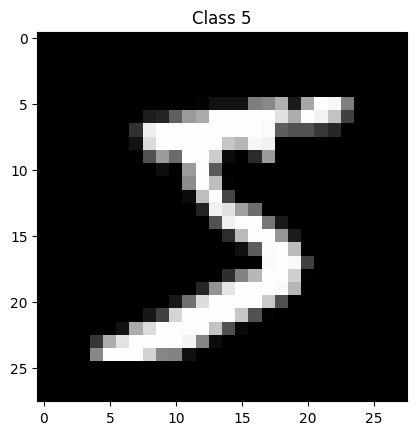

In [4]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+str(y_train[0]))
plt.show()

In [8]:
features_train = X_train.reshape(X_train.shape[0], 28, 28, 1) #(batch,height, width, channel)
features_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

features_train = features_train.astype('float32')
features_test = features_test.astype('float32')

features_train /= 255
features_test /= 255

targets_train = np_utils.to_categorical(y_train, 10)
targets_test = np_utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))

model.add(BatchNormalization())
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                    

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.fit(features_train, targets_train, batch_size=128, epochs=10, validation_data=(features_test, targets_test), verbose=1)

Epoch 1/10
469/469 [==============================] - 200s 422ms/step - loss: 0.1634 - accuracy: 0.9661 - val_loss: 0.3758 - val_accuracy: 0.9077
Epoch 2/10
469/469 [==============================] - 195s 415ms/step - loss: 0.0764 - accuracy: 0.9834 - val_loss: 0.0525 - val_accuracy: 0.9876
Epoch 3/10
469/469 [==============================] - 233s 497ms/step - loss: 0.0561 - accuracy: 0.9861 - val_loss: 0.0422 - val_accuracy: 0.9875
Epoch 4/10
469/469 [==============================] - 260s 556ms/step - loss: 0.0438 - accuracy: 0.9891 - val_loss: 0.0523 - val_accuracy: 0.9869
Epoch 5/10
469/469 [==============================] - 198s 422ms/step - loss: 0.0386 - accuracy: 0.9899 - val_loss: 0.0510 - val_accuracy: 0.9871
Epoch 6/10
469/469 [==============================] - 193s 411ms/step - loss: 0.0349 - accuracy: 0.9912 - val_loss: 0.0526 - val_accuracy: 0.9882
Epoch 7/10
469/469 [==============================] - 192s 409ms/step - loss: 0.0338 - accuracy: 0.9915 - val_loss: 0.0507 -

In [12]:
score=model.evaluate(features_test, targets_test)
print('Test accuracy: %.2f' %score[1])

313/313 [==============================] - 9s 28ms/step - loss: 0.0594 - accuracy: 0.9886
Test accuracy: 0.99


In [14]:
# data augmentation
train_generator = ImageDataGenerator(rotation_range=7, width_shift_range=0.05, shear_range=0,
                                     height_shift_range=0.07, zoom_range=0.05)
test_generator=ImageDataGenerator()

train_generator = train_generator.flow(features_train, targets_train, batch_size=64)
test_generator =test_generator.flow(features_test, targets_test, batch_size=64)

model.fit_generator(train_generator,steps_per_epoch=60000//64, epochs=5, validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5


<ipython-input-14-cccd99111e56>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,steps_per_epoch=60000//64, epochs=5, validation_data=test_generator, validation_steps=10000//64)


937/937 [==============================] - 221s 235ms/step - loss: 0.1810 - accuracy: 0.9711 - val_loss: 0.0459 - val_accuracy: 0.9908
Epoch 2/5
937/937 [==============================] - 222s 237ms/step - loss: 0.0831 - accuracy: 0.9828 - val_loss: 0.0324 - val_accuracy: 0.9927
Epoch 3/5
937/937 [==============================] - 222s 237ms/step - loss: 0.0692 - accuracy: 0.9836 - val_loss: 0.0440 - val_accuracy: 0.9914
Epoch 4/5
937/937 [==============================] - 222s 237ms/step - loss: 0.0702 - accuracy: 0.9847 - val_loss: 0.0382 - val_accuracy: 0.9914
Epoch 5/5
937/937 [==============================] - 221s 236ms/step - loss: 0.0724 - accuracy: 0.9840 - val_loss: 0.0413 - val_accuracy: 0.9896
